In [6]:
from __future__ import print_function, division
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

In [7]:
import numpy as np
np.random.seed(7)
#
#import keras
from keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, GaussianNoise
from tensorflow.keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D
from keras.layers import MaxPooling2D, concatenate
#from tensorflow.keras.layers.advanced_activations import LeakyReLU
#from tensorflow.keras.layers.convolutional import UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from keras import losses
#from keras.utils import to_categorical
#import tf.keras.backend as K

import matplotlib.pyplot as plt


import pandas as pd

from tensorflow import keras
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
physical_devices

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
 tf. __version__

'2.3.0'

In [9]:
D=pd.read_table("400X_LikeTrue_newCDR_Epitope_token.txt",sep="\t")

D=D[~D.sequence.str.contains("X")]
D=D[~D.sequence.str.contains("O")]
D.shape

(7562462, 2)

In [10]:
from numpy.random import seed
seed(1)
Dtrain=D.sample(frac=0.85)
Dtest=D[~D.index.isin(Dtrain.index)]

In [11]:
Dtrain.shape

(6428093, 2)

In [12]:
Dtest.shape

(1134369, 2)

In [13]:
def df_to_array(df, max_len):
    seq_indices = tokenizer.texts_to_sequences(df['sequence'])
    seq_padding = keras.preprocessing.sequence.pad_sequences(seq_indices, maxlen=max_len)
    
    X_train = seq_padding
    y_train = df['type'].to_numpy(dtype=int)
    
    return X_train, y_train

In [14]:
from keras.preprocessing import text
aa_list = list('ACDEFGHIKLMNPQRSTVWY_')
tokenizer = keras.preprocessing.text.Tokenizer(char_level=True, lower=True)
tokenizer.fit_on_texts(aa_list)
seqs = ['AnNLQRn', 'TNLQR']

# 使用分词器转化为整数序列
seq_indices = tokenizer.texts_to_sequences(seqs)
seq_indices
seq_padding = keras.preprocessing.sequence.pad_sequences(seq_indices, maxlen=7)
DD= dict(zip(tokenizer.word_index.values(), tokenizer.word_index.keys()))
#DD[0]=''
DD

{1: 'a',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'k',
 10: 'l',
 11: 'm',
 12: 'n',
 13: 'p',
 14: 'q',
 15: 'r',
 16: 's',
 17: 't',
 18: 'v',
 19: 'w',
 20: 'y',
 21: '_'}

In [15]:
ml = np.max([len(s) for s in Dtrain['sequence']])
X_dtrain, y_dtrain = df_to_array(Dtrain,ml)
X_dtest, y_dtest = df_to_array(Dtest,ml)

In [16]:
np.random.seed(7)
strategy4 = tf.distribute.MirroredStrategy()
with strategy4.scope():
    modelB = Sequential()
    modelB.add(Embedding(output_dim=21,input_dim=X_dtrain.shape[0],input_length=45))
    modelB.add(Bidirectional(LSTM(units=45,return_sequences=True)))
    modelB.add(Bidirectional(LSTM(units=45)))
    #modelD.add(Bidirectional(LSTM(units=45)))
    modelB.add(Dense(1,activation='sigmoid'))
    #modelD.add(TimeDistributed(Dense(1, activation='sigmoid')))
    modelB.compile(
      loss='binary_crossentropy',
      optimizer=tf.keras.optimizers.Adam(lr=0.001),
      metrics=['accuracy'])


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


2021-12-29 12:22:16.455228: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-29 12:22:16.461150: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 3593240000 Hz
2021-12-29 12:22:16.461574: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x560b67984b60 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-12-29 12:22:16.461589: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-12-29 12:22:16.597046: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2

In [17]:
np.__version__

'1.18.5'

In [18]:
modelB.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 45, 21)            13260450  
_________________________________________________________________
bidirectional (Bidirectional (None, 45, 90)            24120     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 90)                48960     
_________________________________________________________________
dense (Dense)                (None, 1)                 91        
Total params: 13,333,621
Trainable params: 13,333,621
Non-trainable params: 0
_________________________________________________________________


In [19]:
y_dtrain.shape

(6428093,)

In [21]:
#cw = {0: 1, 1:25} class_weight=cw,
history14 = modelB.fit(
    X_dtrain,y_dtrain,
    epochs=50,
    batch_size=512,
    
    verbose=1)

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
Epoch 1/50


2021-12-29 12:22:28.617806: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2021-12-29 12:22:29.038826: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudnn.so.7


 1063/12555 [=>............................] - ETA: 4:53 - loss: 0.0335 - accuracy: 0.9943

KeyboardInterrupt: 

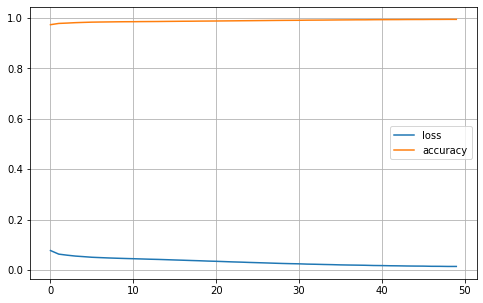

In [15]:
pd.DataFrame(history14.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [16]:
X_dtest.shape

(111432, 45)

In [17]:
predict=modelB.predict(X_dtest)
y_true=pd.Series(y_dtest,name="Actually")
y_predict=pd.Series(np.around(predict).reshape(111432),name="Predict")

In [18]:
pd.crosstab(y_true, y_predict)

Predict,0.0,1.0
Actually,,
0,105594,1013
1,1277,3548


In [19]:
Dtest.reset_index(drop=True,inplace=True)

In [20]:
Dtest["predict"]= y_predict

/home/cxj/anaconda3/envs/tensorflow_gpu2.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
#Dtest.to_csv("40X_BiLSTM_predict_TrueCDR_Epitope_token_rm_Test0.15.txt",sep="\t",index=False)

In [21]:
modelB.save("/home/cxj/CD22_DL/New/40X_TrueLike_model_BiLSTM_rmPD1_ATNDDYReRun.h5")
#modelP.save("/home/cxj/CD22_DL/New/400X_TrueLike_model_BiLSTM.h5")
#model=keras.models.load_model("/home/cxj/CD22_DL/New/400X_TrueLike_model_BiLSTM.h5")

In [22]:
def df_to_arrayNew(df, max_len):
    seq_indices = tokenizer.texts_to_sequences(df['sequence'])
    seq_padding = keras.preprocessing.sequence.pad_sequences(seq_indices, maxlen=max_len)
    
    X_train = seq_padding
    #y_train = df['type'].to_numpy(dtype=int)
    
    return X_train

In [23]:
IN=pd.read_table("Epuzumab.Epitope1.txt",header=None)
IN.columns=['sequence']
IN['sequence']="ARRDITTFY_"+IN['sequence']
IN1=df_to_arrayNew(IN,45)

In [24]:
IN['predict']=modelB.predict(IN1)
IN

,sequence,predict
0,ARRDITTFY_PHILPPELEGRWSHGKIDTV,0.000126
1,ARRDITTFY_HILPPELEGRWSHGKIDTVQ,0.000008
2,ARRDITTFY_ILPPELEGRWSHGKIDTVQL,0.000269
3,ARRDITTFY_LPPELEGRWSHGKIDTVQLN,0.000302
4,ARRDITTFY_PPELEGRWSHGKIDTVQLNK,0.003814
5,ARRDITTFY_PELEGRWSHGKIDTVQLNKE,0.000107
6,ARRDITTFY_ELEGRWSHGKIDTVQLNKEK,0.002692
7,ARRDITTFY_LEGRWSHGKIDTVQLNKEKC,0.000013
8,ARRDITTFY_EGRWSHGKIDTVQLNKEKCE,0.000196
9,ARRDITTFY_GRWSHGKIDTVQLNKEKCEV,0.000003


,sequence,predict
138,ARGRLYWGGRNAWFDY_PHILPPELEGRWSHGKIDTV,0.969291
237,RRGRLYYGGANAWFDY_PHILPPELEGRWSHGKIDTV,0.999407
324,RARRGGLYSGGYYYGMDV_PHILPPELEGRWSHGKIDTV,0.953194
651,DARSIRARGDYPGMDN_PHILPPELEGRWSHGKIDTV,0.951026
652,DARSIRARGDYPGMDN_HILPPELEGRWSHGKIDTVQ,0.996468
...,...,...
530938,ARLDYGYGYWAMDV_HILPPELEGRWSHGKIDTVQ,0.952668
531615,ARDLGGYSGSYYSGFDV_PHILPPELEGRWSHGKIDTV,0.958881
532092,ARPGYYGWGFDV_PHILPPELEGRWSHGKIDTV,0.983049
532093,ARPGYYGWGFDV_HILPPELEGRWSHGKIDTVQ,0.990880


In [27]:
C.to_csv("40x_BiLSTM_GenerateOAS_OldepitopeTop3_predict_ALL.txt",sep="\t",index=False)

In [28]:
C.shape

(533016, 2)

In [26]:
C1=pd.read_table("ARRDITTFY.mutation",sep="\t",header=None)
C1.columns=["sequence","Tag"]
C2=pd.read_table("ARRDITTFY.mutation",sep="\t",header=None)
C2.columns=["sequence","Tag"]
C3=pd.read_table("ARRDITTFY.mutation",sep="\t",header=None)
C3.columns=["sequence","Tag"]

In [27]:
C1["sequence"]=C1["sequence"]+"_IDTVQLNKEKCEVSSNPEYT"
C2["sequence"]=C2["sequence"]+"_SHGKIDTVQLNKEKCEVSSN"
C3["sequence"]=C3["sequence"]+"_ILPPELEGRWSHGKIDTVQL"

In [29]:
#ml = np.max([len(s) for s in C1['sequence']])
#X1 = df_to_arrayNew(C1,45)
#print(X1.shape)
#X2 = df_to_arrayNew(C2,45)
#print(X2.shape)
#X3 = df_to_arrayNew(C3,45)
#print(X3.shape)
for i in range(0,C1.shape[0],10000):
    print(i)
    X1 = df_to_arrayNew(C1.loc[i:i+10000],45)
    C1.loc[i:i+10000,"predict_BiLSTM"]=modelB.predict(X1)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
13

In [33]:
for j in range(0,C2.shape[0],10000):  
    print(j)
    X2 = df_to_arrayNew(C2.loc[j:j+10000],45)
    C2.loc[j:j+10000,"predict_BiLSTM"]=modelB.predict(X2)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
13

In [34]:
for k in range(0,C3.shape[0],10000): 
    print(k)
    X3 = df_to_arrayNew(C3.loc[k:k+10000],45)
    C3.loc[k:k+10000,"predict_BiLSTM"]=modelB.predict(X3)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
13

In [35]:
C=pd.concat([C1,C2,C3],axis=0)

In [36]:
C[C.predict_BiLSTM>0.5]

,sequence,Tag,predict_BiLSTM
61,ARRGITTFY_IDTVQLNKEKCEVSSNPEYT,single,0.992821
67,ARRNITTFY_IDTVQLNKEKCEVSSNPEYT,single,0.515492
81,ARRDGTTFY_IDTVQLNKEKCEVSSNPEYT,single,0.843392
85,ARRDMTTFY_IDTVQLNKEKCEVSSNPEYT,single,0.963576
92,ARRDVTTFY_IDTVQLNKEKCEVSSNPEYT,single,0.667313
...,...,...,...
4301392,ARRDITTIYAFY_ILPPELEGRWSHGKIDTVQL,tInsert,0.844994
4302072,ARRDIETTYFFY_ILPPELEGRWSHGKIDTVQL,tInsert,0.654375
4302571,ARYRDITTYIFY_ILPPELEGRWSHGKIDTVQL,tInsert,0.510428
4303295,ARYRDITTYNFY_ILPPELEGRWSHGKIDTVQL,tInsert,0.532770


In [37]:
C[C.predict_BiLSTM>0.95]

,sequence,Tag,predict_BiLSTM
61,ARRGITTFY_IDTVQLNKEKCEVSSNPEYT,single,0.992821
85,ARRDMTTFY_IDTVQLNKEKCEVSSNPEYT,single,0.963576
194,CRFDITTFY_IDTVQLNKEKCEVSSNPEYT,double,0.993919
212,CRRFITTFY_IDTVQLNKEKCEVSSNPEYT,double,0.964282
232,CRRDFTTFY_IDTVQLNKEKCEVSSNPEYT,double,0.971902
...,...,...,...
4289001,ARRFDPITTYFY_ILPPELEGRWSHGKIDTVQL,tInsert,0.983566
4290861,ARRDIRDTTYFY_ILPPELEGRWSHGKIDTVQL,tInsert,0.957511
4291083,ARRDIETSTYFY_ILPPELEGRWSHGKIDTVQL,tInsert,0.953427
4293041,ARRDIRDTTYFY_ILPPELEGRWSHGKIDTVQL,tInsert,0.957511


In [38]:
#C=C.sort_values(by="predict_BiLSTM",ascending=False)

In [39]:
C.to_csv("400X_ReallyOAS_NotUsed_predict_BiLSTM_ReRun.txt",sep="\t",index=False)